# Gaussian process regrssion demo

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
print ("Packages Loaded")

Packages Loaded


# Define training data

Training data


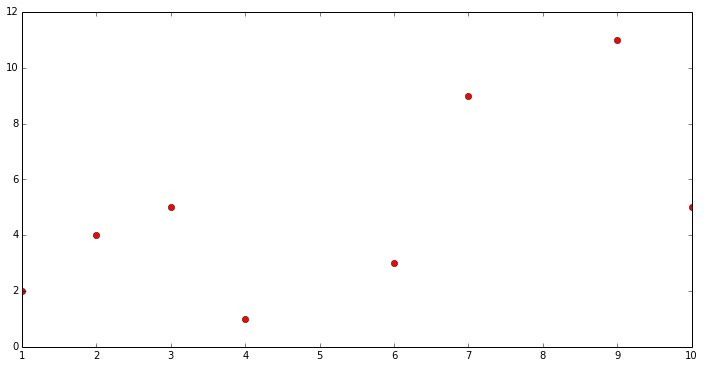

In [13]:
x = np.array([[1, 2, 3, 4, 6, 7, 9, 10]]).T
y = np.array([[2, 4, 5, 1, 3, 9, 11, 5]]).T

# Plot
plt.figure(1, figsize=(12, 6))
plt.plot(x[:, 0], y[:, 0], 'ro', label='Original data')

print ("Training data")

# Define kernel function 

In [8]:
def kernel_se(X1, X2):
    n1 = X1.shape[0]
    n2 = X2.shape[0]
    K  = np.zeros((n1, n2))
    for i in range(n1):
        for j in range(n2):
            x1 = X1[i, :]
            x2 = X2[j, :]
            d  = x1 - x2
            K[i, j] = 10*np.exp(-d*d/(1))
            if n1 > 1 and i == j:
                K[i, j] = K[i, j] + 0.001
    return K
print ("Define kernel function")

Define kernel function


# Kernel matrix

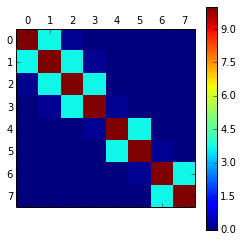

In [9]:
K = kernel_se(x, x)
plt.figure(1, figsize=(6, 6))
plt.matshow(K)
plt.colorbar()
plt.show()

# Do Gaussian process regression

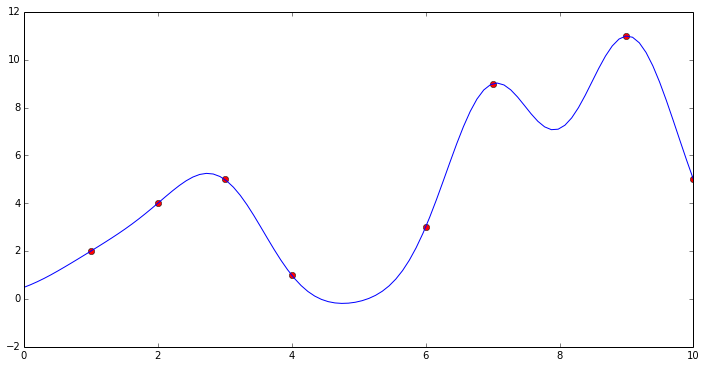

In [10]:
ntest = 100
xtest = np.array([np.linspace(0, 10, ntest)]).T
Ktest = kernel_se(xtest, x)

# GPR
alpha = np.matmul(np.linalg.inv(K), y)
ytest = np.matmul(Ktest, alpha)
plt.figure(1, figsize=(12, 6))
plt.plot(x[:, 0], y[:, 0], 'ro', label='Original data')
plt.plot(xtest[:, 0], ytest[:, 0], 'b-', label='GPR')

# GP Variance

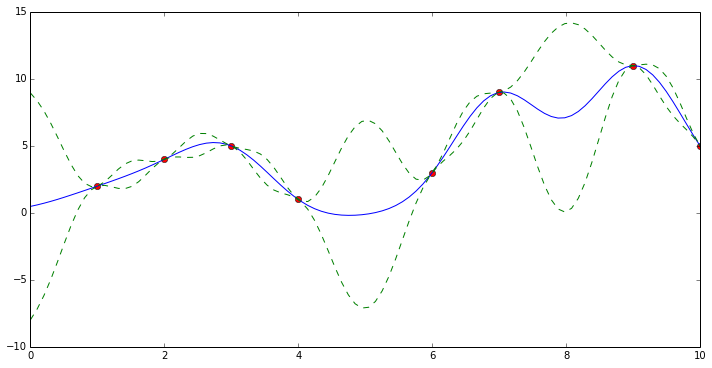

In [11]:
vartest = np.zeros((ntest, 1))
for i in range(ntest):
    xtemp  = xtest[i:i+1, :]
    ktemp  = kernel_se(xtemp, xtemp)
    ktemp2 = kernel_se(xtemp, x)
    Mtemp  = np.matmul(ktemp2, np.linalg.inv(K))
    Mtemp2 = np.matmul(Mtemp, ktemp2.T)
    vartest[i, :] = ktemp - Mtemp2

# Plot
plt.figure(1, figsize=(12, 6))
plt.plot(x[:, 0], y[:, 0], 'ro', label='Original data')
plt.plot(xtest[:, 0], ytest[:, 0], 'b-', label='GPR')
plt.plot(xtest[:, 0], ytest[:, 0] + vartest[:, 0], 'g--', label='GPR')
plt.plot(xtest[:, 0], ytest[:, 0] - vartest[:, 0], 'g--', label='GPR')